<a href="https://github.com/victoresende19" rel="some text">![Foo](https://www.alelo.com.br/content/dam/alelo-institucional/Cabecalho-Rodape/Originais-Alelo_Outline2.png)</a>

<h2 style="text-align:center">Desafio Alelo</h2>
<p style="text-align:center;font-size:13px;"></p>
   
<h2 style="text-align:center">Victor Augusto Souza Resende</h2>
<p style="text-align:center;font-size:13px;">Autor</p>

## Sumário

    
- [1. Contexto](#1)<br>
    * [1.2 Observatório sismológico](#12)<br>
    
- [2. Coletando os dados - API](#2) <br>
    * [2.1 Coletando as variáveis necessárias](#21)<br>
    * [2.2 Criando um dataframe com a lista das variáveis coletadas](#22)<br>
    * [2.3 Manipulação dos dados](#23)<br>
        + [2.3.1 Tipo do terremoto](#231)<br>
        + [2.3.2 Variáveis de tempo](#232)<br>
    
- [3. Análise exploratória](#3) <br>
    * [3.1 Magnitude](#31)<br>
    * [3.2 Local](#32)<br>
    * [3.3 Tipo](#33)<br>
    * [3.4 Significância](#34)<br>
    * [3.5 Profundidade](#35)<br>
    * [3.5 Mapas-mundí](#36)<br>
    
- [4. Modelagem](#4) <br>
    * [4.1 Separaçao em treino e teste](#41)<br>
    * [4.2 Normalização dos dados](#42)<br>
    * [4.3 Random forest](#43)<br>
        + [4.3.1 GridSearchCV](#431)<br>
        + [4.3.2 Visualização das árvores](#432)<br>

- [5. Banco de dados (Não utilizado)](#5)<br>
    * [5.1 Conexão SQlite](#51)<br>
        + [5.1.2 Acessando dados SQLite](#512)<br>

In [61]:
# manipulacao de dados
import pandas as pd
import numpy as np

# pre processamento
from sklearn.decomposition import PCA

# clusterizacao
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

# testes estatisticos
from scipy.stats import shapiro

# classificação e regressão
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import  BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE

# graficos
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

# 1 - Contexto <a id="1"></a>

Para tornar a resolução proposta mais dinâmica, deu-se o contexto de HeroStats, uma empresa que faz avaliação de super-heróis visando encontrar os mais talentosos e possíveis perigos para a sociedade através dos dados, dos quais pode-se acessar <a href="https://www.kaggle.com/datasets/claudiodavi/superhero-set/data" rel="some text">clicando aqui</a>. De maneira simples, são duas bases de dados a serem estudadas, uma com informações dos heróis e a outra com as respectivas informações dos poderes de cada um.

A empresa HeroStats é uma grande empresa de avaliação para super-heróis, da qual é comumente consultada por grandes potencias mundiais.Dessa forma, a equipe de cientistas de dados foi convocada para verificar e encontrar respostas para os problemas abaixo.

### 1.2 - Problemas <a id="12"></a>

A fim de identificar pontos importantes visando a atividade dos super-herois na sociedade, foi solicitado à HeroStats a avaliação dos problemas:
- Agrupamento: queremos agrupar nossos super-heróis de acordo com seus poderes e informações. Execute um método de cluster não supervisionado usando o número de clusters que você julgar mais apropriado
- Identificação dos bandidos: Nesta seção, lidaremos com o problema de aprendizagem supervisionada. Mais concretamente, iremos formular uma tarefa de classificação, e nosso alvo é o alinhamento dos super-heróis (bom ou mau).
- Além do bem e do mal: Vamos transformar nosso problema em uma tarefa de regressão e tentar prever o peso dos super-heróis dados os outros recursos
- Análise dos modelos e resultados
- Implementação Streamlit: Desenvolva uma aplicação interativa usando Streamlit que permita aos usuários explorar o conjunto de dados de super-heróis e interagir com os modelos de machine learning desenvolvidos nas questões anteriores.

Para informações mais detalhadas de cada pergunta, favor consultar o relatório solicitante.

# 2 - Acessando a base de dados <a id="2"></a>

In [62]:
df_hero_info = pd.read_csv('../data/heroes_information.csv')
df_hero_powers = pd.read_csv('../data/super_hero_powers.csv')

In [63]:
df_hero_info.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [64]:
df_hero_powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 3 - EDA e Pré processamento <a id="3"></a>

### 3.1 - Estatísticas - Medidas de tendência central e dispersão <a id="31"></a>

Essa abordagem teve como objetivo a melhor visualização do usuário quando o código for implementado na web via biblioteca streamlit. Então, inicialmente, decidiu-se pela avaliação dos metadados das bases de informações dos heróis e respectivos poderes, verificando os tipos, colunas e informações importantes.

In [65]:
df_hero_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [66]:
df_hero_powers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


Assim, verifica-se a existência da coluna "Unnamed: 0" na base de dados de informações dos heróis, coluna da qual, ao verificar o dicionário de dados, indica apenas os indíces, informação irrelevante para a análise e que será abordada no pré-processamento. Então, agora verifica-se as estatísticas básicas: medidas de tendência central e dispersão para as bases de informações dos heróis e respectivos poderes, para as respectivas bases.

In [67]:
df_hero_info.describe()

,Unnamed: 0,Height,Weight
count,734.000000,734.000000,732.000000
mean,366.500000,102.254087,43.855191
std,212.031837,139.624543,130.823733
min,0.000000,-99.000000,-99.000000
25%,183.250000,-99.000000,-99.000000
50%,366.500000,175.000000,62.000000
75%,549.750000,185.000000,90.000000
max,733.000000,975.000000,900.000000


In [68]:
df_hero_powers.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,3-D Man,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


### 3.2 - Análise de dados faltantes e duplicados <a id="32"></a>

A análise de dados faltantes (NaN) e duplicados é importante visando a etapa de criação do modelo a fim de evitar problemas como overfitting ou underfitting, isto é, quando o modelo apenas decora tudo ou não aprende nada.

In [69]:
def na_values_verify(df: pd.DataFrame):
    """
    Recebe um dataframe para verificar os valores nulos de todas colunas.

    Parâmetros:
    - df: dataframe a ser verificado
    
    Retorna:
    - Um print com as informações da porcentagem de nulos por variável.
    """
    
    na_df_values = ((df.isnull().sum())/(df.shape[0]))*100
    print(f'\n{"="*20} Informações NaN {"="*20}\nA porcentagem de dados faltantes por variável é:\n{na_df_values[na_df_values > 0.0]}')

def duplicated_values_verify(df: pd.DataFrame):
    """
    Recebe um dataframe para verificar os valores duplicados.
    
    Parâmetros:
    - df: dataframe a ser verificado

    Retorna:
    - Um print com as informações da quantidade de duplicados.
    """
    
    duplicated_df_values = df.duplicated().sum()
    return f'\n{"="*20} Informações duplicadas {"="*20}\nA porcentagem de dados duplicados é:\n{duplicated_df_values}'

In [70]:
print(f'Heróis {duplicated_values_verify(df_hero_info)}\n\n')
print(f'Poderes {duplicated_values_verify(df_hero_powers)}')

Heróis 
==================== Informações duplicadas ====================
A porcentagem de dados duplicados é:
0


Poderes 
==================== Informações duplicadas ====================
A porcentagem de dados duplicados é:
0


Abaixo são verificadas as principais variáveis relevantes de informações dos heróis.

Text(0.5, 1.0, 'Quantidade por cor de pele')

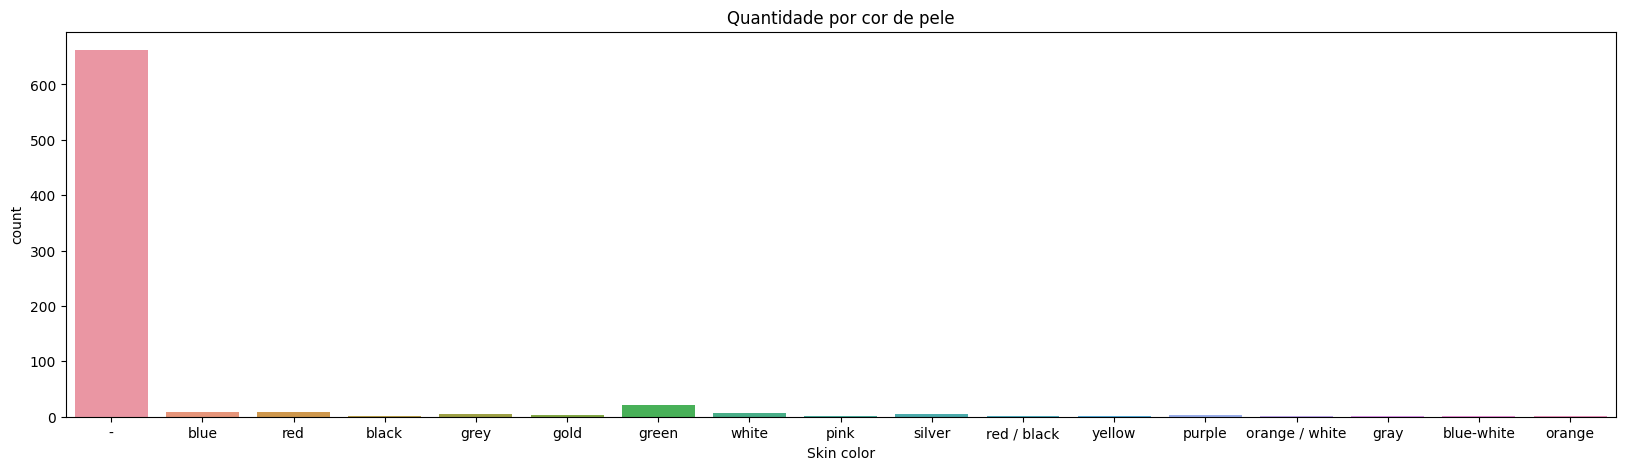

In [71]:
figure(figsize=(20,5))
sns.countplot(x ='Skin color', data = df_hero_info).set_title('Quantidade por cor de pele')

Text(0.5, 1.0, 'Quantidade por raça')

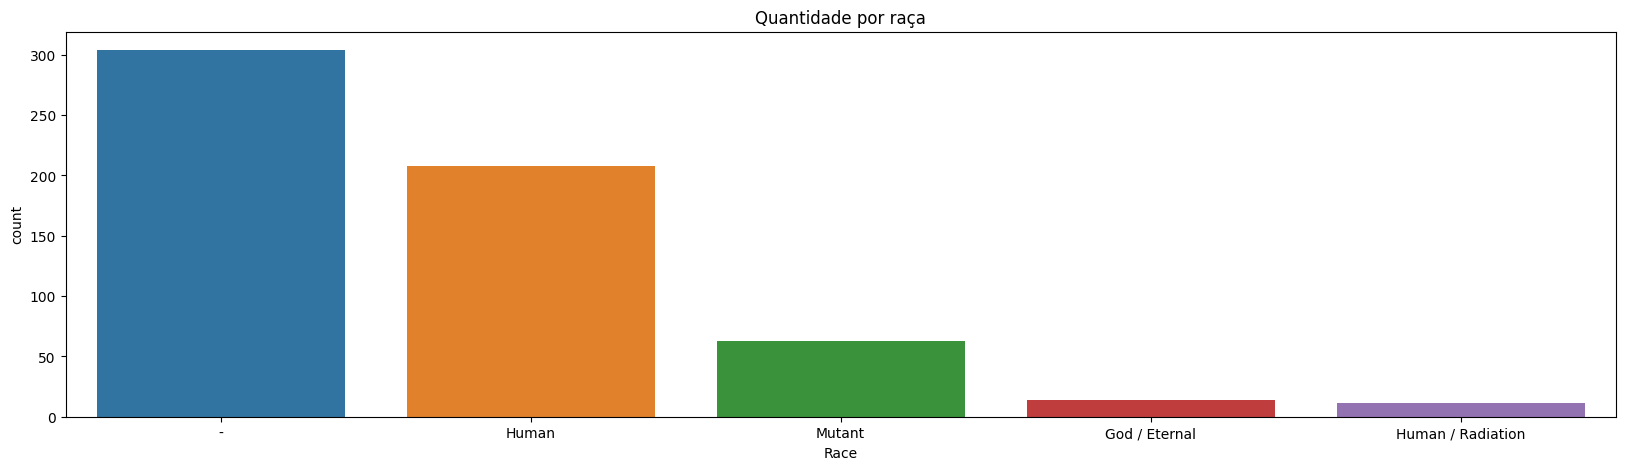

In [72]:
figure(figsize=(20,5))
sns.countplot(x ='Race', data = df_hero_info,
              order = df_hero_info['Race'].value_counts().iloc[:5].index).set_title('Quantidade por raça')

Text(0.5, 1.0, 'Quantidade por gênero')

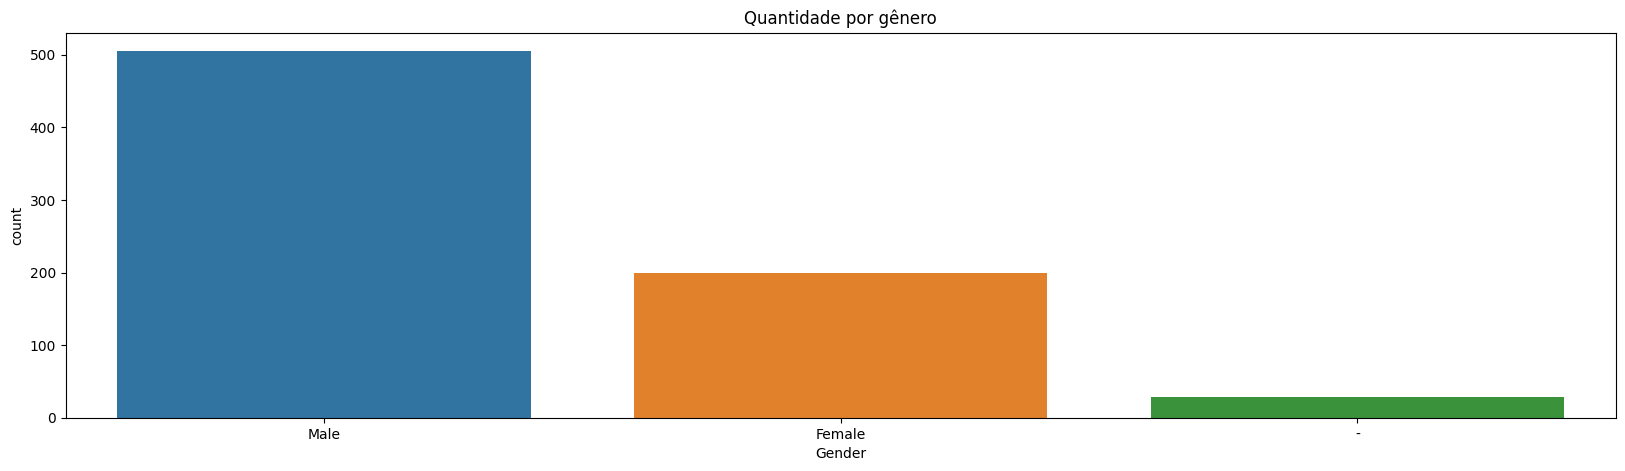

In [73]:
figure(figsize=(20,5))
sns.countplot(x ='Gender', data = df_hero_info).set_title('Quantidade por gênero')

Text(0.5, 1.0, 'Quantidade por alinhamento')

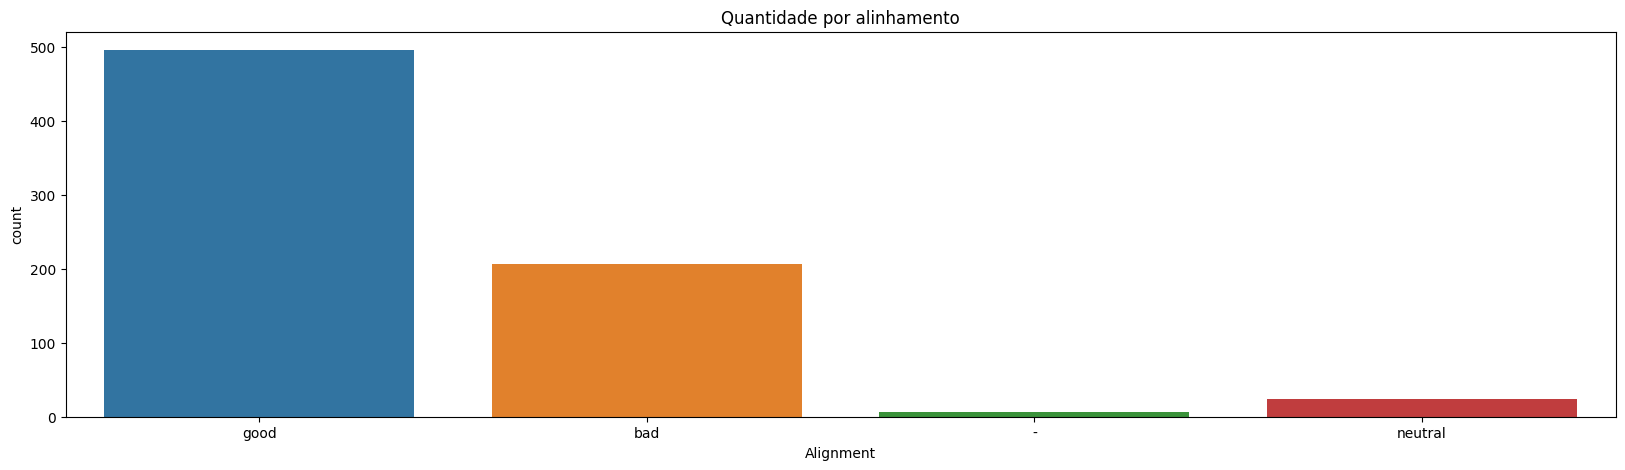

In [74]:
figure(figsize=(20,5))
sns.countplot(x ='Alignment', data = df_hero_info).set_title('Quantidade por alinhamento')

Text(0.5, 1.0, 'Peso por altura')

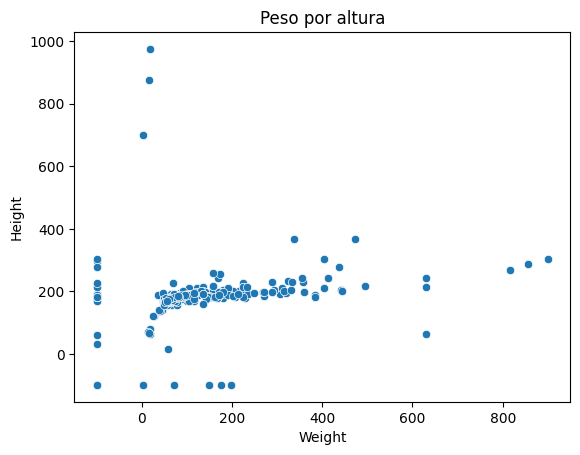

In [75]:
sns.scatterplot(x='Weight', y='Height', data=df_hero_info).set_title('Peso por altura')

Assim, verifica-se que os valores "-" para variáveis categoricas e -99 para variáveis numéricas são dados dos quais representam possíveis falhas do sistema, dos quais são irrelevantes.

### 3.3 - Pré-processamento <a id="33"></a>

Exclusão da coluna "Unnamed: 0" da base de dados sobre informações dos heróis, da qual na documentação consta como uma coluna de index. Sendo assim, não possui relevância e não agrega a análise. 

- Remoção coluna Unnamed: 0 da base de informações dos heróis (df_hero_info)
- Alteração valores "-" e -99: Troca dos valores "-" e -99 para NaN 
- Dados NaN: Verificação de dados NaN.
- Lidando com valores NaN - Alignment e Weight: As variáveis Alignment e Weight constam nas análises solicitadas. Para isso, dado a pouca (%) de dados faltantes, decidiu-se pela exclusão.
- Merge dos dados: Junção das tabelas de informação dos heróis e poderes por meio da coluna name.
- Removendo NaN: A imputação dos dados faltantes restantes torna-se inviável, além de não conter grandes informações. Decidiu-se pela exclusão
- Criação de colunas binárias: Visando a análise e criação de modelos, converteu-se as colunas categoricas em numérica binária.

In [76]:
# Remoção da coluna Unnamed: 0
df_hero_info = df_hero_info.drop(columns=['Unnamed: 0'])

# Troca dos valores - por NaN
df_hero_info = df_hero_info.replace('-', np.nan)
df_hero_powers = df_hero_powers.replace('-', np.nan)

# Troca dos Weight e Height - por NaN
df_hero_info['Weight'] = df_hero_info['Weight'].replace(-99.0, np.nan)
df_hero_info['Height'] = df_hero_info['Height'].replace(-99.0, np.nan)

In [77]:
print(f'Heróis {na_values_verify(df_hero_info)}\n\n')
print(f'Poderes {na_values_verify(df_hero_powers)}')


==================== Informações NaN ====================
A porcentagem de dados faltantes por variável é:
Gender         3.950954
Eye color     23.433243
Race          41.416894
Hair color    23.433243
Height        29.564033
Publisher      2.043597
Skin color    90.190736
Alignment      0.953678
Weight        32.561308
dtype: float64
Heróis None



==================== Informações NaN ====================
A porcentagem de dados faltantes por variável é:
Series([], dtype: float64)
Poderes None


In [78]:
print(f'Heróis {na_values_verify(df_hero_info)}\n\n')
print(f'Poderes {na_values_verify(df_hero_powers)}')


==================== Informações NaN ====================
A porcentagem de dados faltantes por variável é:
Gender         3.950954
Eye color     23.433243
Race          41.416894
Hair color    23.433243
Height        29.564033
Publisher      2.043597
Skin color    90.190736
Alignment      0.953678
Weight        32.561308
dtype: float64
Heróis None



==================== Informações NaN ====================
A porcentagem de dados faltantes por variável é:
Series([], dtype: float64)
Poderes None


In [79]:
df_hero_info[['Height', 'Weight']].describe()

,Height,Weight
count,517.000000,495.000000
mean,186.726306,112.252525
std,59.251895,104.151142
min,15.200000,2.000000
25%,173.000000,61.000000
50%,183.000000,81.000000
75%,191.000000,108.000000
max,975.000000,900.000000


In [80]:
# Imputação das variáveis de Weight e Height
df_hero_info['Height'] = df_hero_info['Height'].fillna(df_hero_info.groupby(['Race','Gender'])['Height'].transform('mean'))
df_hero_info['Weight'] = df_hero_info['Weight'].fillna(df_hero_info.groupby(['Race','Gender'])['Weight'].transform('mean'))
df_hero_info = df_hero_info.drop('Skin color', axis=1)

In [81]:
column_names = df_hero_powers.columns.values
column_names[0] = 'name'
df_hero_powers.columns = column_names

In [82]:
# Merge das bases
df_heros = pd.merge(df_hero_info, df_hero_powers, on='name')
df_heros.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,876.0,Marvel Comics,bad,16.0,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
df_heros = df_heros.replace(0, False)
df_heros = df_heros.replace(1, True)

In [84]:
# Remoção dos dados faltantes restantes

df_heros = df_heros.dropna()
df_heros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 658
Columns: 176 entries, name to Omniscient
dtypes: bool(167), float64(2), object(7)
memory usage: 81.0+ KB


# 4. Clusterização<a id="4"></a>

Primeiro, queremos agrupar nossos super-heróis em quipes, de acordo com seus poderes e informações. Execute um método de cluster não supervisionado usando o número de clusters que você julgar mais apropriado. Para a clusterização, decidiu-se responder a pergunta: é possível agrupar os heróis de acordo com as características de poderes deles contidos na base de dados df_hero_powers? Para isso, devido a grande dimensionalidade dos dados, principalmente por conta das informações dos poderes, fez-se a utilização da técnica PCA para reduzir a dimensionalidade dos dados.

### Redução de dimensionalidade

Para a utilização do PCA, decidiu-se que deveriam ser encontrados os componentes principais que contessem até 80% da informação da base de dados, isto é, a variância explicada.

In [85]:
pca = PCA(0.8, random_state=42)
data_pca = pca.fit_transform(df_hero_powers.drop('name', axis=1))

Agora com a redução da dimensionalidade aplicada, torna-se importante encontrar o número de clusters ideiais para a separação dos dados. Para isso, foi utilizada a métrica de silhouette, da qual retorna a quantidade ideal de clusters.

### Avaliação das métricas de quantidade de cluster - silhouette score e gráfico do cotovelo

In [86]:
def find_optimal_clusters(data, min_clusters, max_clusters):
    """
    Esta função calcula o KMeans para diferentes quantidades de clusters, de 'min_clusters' até 'max_clusters',
    e retorna o número de clusters que maximiza o silhouette score.

    Parâmetros:
    - data: conjunto de dados (DataFrame ou array NumPy) para clusterização.
    - min_clusters: mínimo de clusters a ser testado.
    - max_clusters: máximo de clusters a ser testado.

    Retorna:
    - Um dicionário contendo o número ótimo de clusters e o respectivo silhouette score.
    """
    
    silhouette_scores = []
    
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append((n_clusters, silhouette_avg))
    
    optimal_n_clusters, best_score = max(silhouette_scores, key=lambda x: x[1])
    print(f'A quantidade de clusters ideal é de: {optimal_n_clusters}. Melhor score: {best_score}')
    
    return optimal_n_clusters

In [87]:
num_clusters = find_optimal_clusters(data_pca, 2, 30)

A quantidade de clusters ideal é de: 2. Melhor score: 0.1800251455230727


### Criação do modelo de cluster - Kmeans

Agora basta a aplicação de algum algoritmo de clusterização. Para isso, decidiu-se pelo KMeans visando descobrir padrões nos heróis e criar as melhores equipes possíveis. 

In [88]:
km_model = KMeans(num_clusters, random_state=42, n_init=10)
km_model.fit(data_pca)

df_hero_powers['Cluster'] = km_model.labels_
df_hero_powers['Cluster'].value_counts()

1    413
0    254
Name: Cluster, dtype: int64

<AxesSubplot: ylabel='Cluster'>

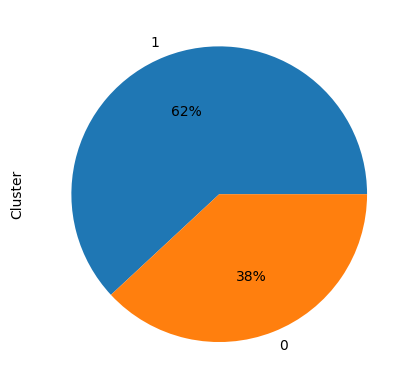

In [89]:
df_hero_powers['Cluster'].value_counts().plot.pie(autopct='%1.f%%')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 667 samples in 0.000s...
[t-SNE] Computed neighbors for 667 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 667 / 667
[t-SNE] Mean sigma: 0.754583


[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.442860
[t-SNE] KL divergence after 1000 iterations: 0.953297


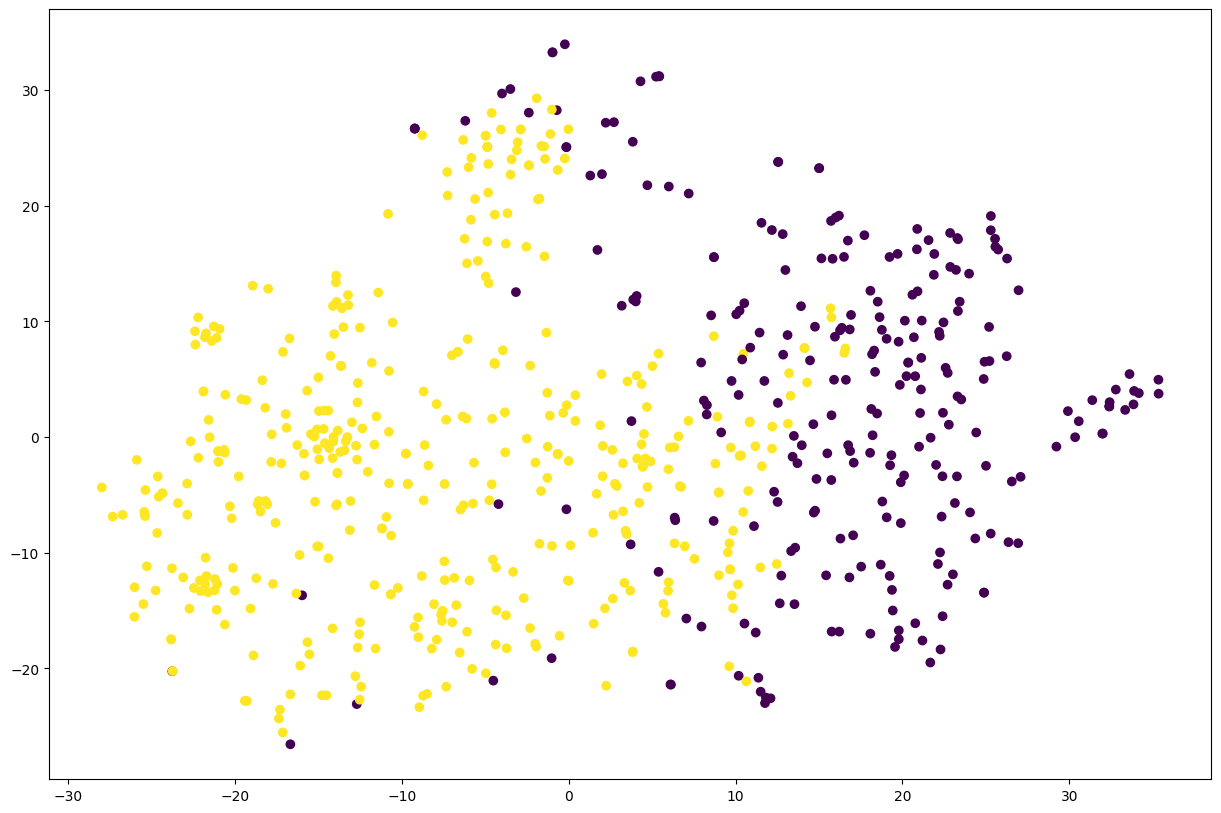

In [90]:
tsne_clusters=TSNE(verbose=1, random_state=42)
tsne_results=tsne_clusters.fit_transform(data_pca)

plt.figure(figsize=(15, 10))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=km_model.labels_)

### 4.1 - Qual algoritmo você escolheu e por quê? <a id="41"></a>

Na HeroStats, escolhemos o algoritmo **K-Means** para nossas tarefas de clusterização devido à sua eficácia e simplicidade na formação de grupos com base na proximidade aos centróides. Após uma análise cuidadosa de várias alternativas, como DBSCAN e HDBSCAN, optamos por descartar esses métodos por motivos específicos relacionados à natureza dos nossos dados e aos objetivos da análise.

O DBSCAN, que é bem adaptado para identificar clusters de forma arbitrária e lidar com outliers, foi descartado principalmente porque nossos dados tendem a ser distribuídos de maneira esférica. Assim, a necessidade de avaliar a densidade para definir clusters não se mostrou uma vantagem nesse contexto, tornando o DBSCAN menos apropriado.

Por outro lado, o HDBSCAN, conhecido por sua capacidade de lidar com dados que apresentam uma estrutura hierárquica e variada densidade, também foi considerado inadequado. Nosso conjunto de dados não demonstrou padrões hierárquicos claros que justificassem o uso desse método mais complexo, que também possui maior exigência computacional em comparação com o K-Means.

### 4.2 - Quais recursos você usou e por quê? Explique qualquer pré-processamento ou engenharia de recursos (seleção) que você executou. <a id="41"></a> 

Devido a grande dimensionalidade dos dados de poderes, cerca de 168 colunas,  foi necessária a implementação de técnicas de redução de dimensionalidade para simplificar o modelo sem perder informações cruciais, visando um modelo mais parsimonioso. Para isso, foi escolhido a técnica **PCA** que faz um arranjo linear entre as variáveis originais. Para a escolho dos componentes principais, decidiu-se pela quantidade que representasse 80% (variância explicada) da informação dos dados, o que resultou em 2 componentes.

Além disso, devido ao KMEans necessitar previamente a quantidade de clusters, foi realizada uma análise do **método da silhueta**, que retorna a quantidade ideal de cluster. O índice de silhueta varia de -1 a 1, onde valores próximos a 1 indicam clusters muito homogêneos e valores próximos a -1 indicam clusters heterogêneos. Este método nos ajudou a identificar o número de clusters que melhor segmenta os dados, garantindo que os grupos formados sejam internamente coesos e claramente distintos entre si.

### 4.3 -  Como você escolheu esse número? Como você avalia a qualidade dos clusters finais? <a id="43"></a> 

O número de clusters foi determinado através do método da silhueta, o qual varia de -1 a 1, onde valores próximos a 1 indicam clusters muito homogêneos e valores próximos a -1 indicam clusters heterogêneos. Foi utilizada esta medida para identificar o número ótimo de clusters, escolhendo aquele que maximiza o índice de silhueta médio, indicando um equilíbrio ideal entre coesão interna e separação entre os clusters.

Para avaliar a qualidade dos clusters após a formação, empregamos a técnica de visualização t-Distributed Stochastic Neighbor Embedding (t-SNE), que nos permite observar a disposição dos clusters em um espaço bidimensional. Esta visualização nos ajudou a verificar intuitivamente se os clusters formados são distintos e agrupados de maneira compacta, o que é um indicativo de boa qualidade de clustering.

# 5. Identificação dos bandidos <a id="5"></a>

Nesta seção, lidaremos com o problema de aprendizagem supervisionada. Mais concretamente, iremos formular uma tarefa de classificação, e nosso alvo é o alinhamento dos super-heróis (bom ou mau).

Primeiro, usaremos o algoritmo Naive Bayes. Execute o algoritmo nos dados dos super-heróis para prever a variável de alinhamento e avaliar os resultados. Novamente, detalhe qualquer pré-processamento e engenharia de recursos que você aplicou no processo.


### Verificação desbalanceamento de classes

Como identificado na etapa de exploração dos dados, a variável Alinhamento possui um desbalanceamento entre as classes. Entretanto, esse cenário é normal, uma vez que, dada as políticas públicas e notícias na mídia, as pessoas com super-poderes tendem a ser heróis. Assim, a quantidade de vilões e neutros realmente tende a ser baixa.

In [91]:
df_heros.isnull().sum()

name                     0
Gender                   0
Eye color                0
Race                     0
Hair color               0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 176, dtype: int64

Text(0.5, 1.0, 'Quantidade por alinhamento')

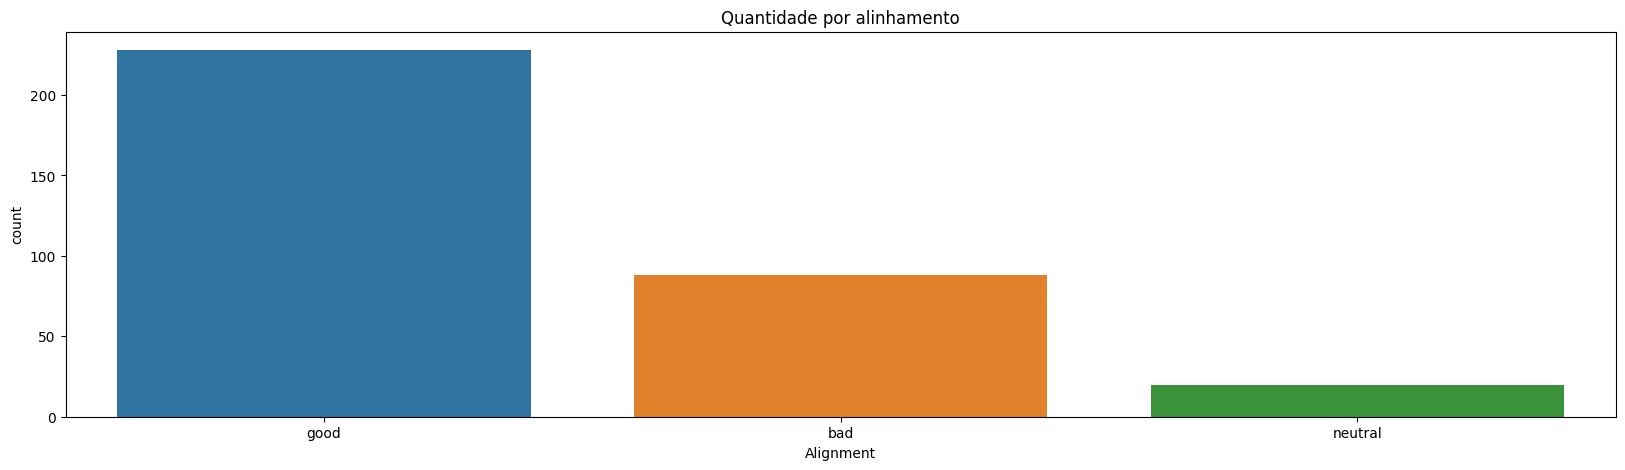

In [92]:
figure(figsize=(20,5))
sns.countplot(x ='Alignment', data = df_heros).set_title('Quantidade por alinhamento')

### Verificação dos pressupostos

Como todo modelo, há pressupostos dos quais devem ser verificados e levados em consideração. Assim, inicialmente é verificada a independência das variável, avaliada pela correlação de Pearson, do qual valor próximos de 1 e -1 indicam uma relação.

In [93]:
# 1. Variáveis independentes e Correlação entre si
correlations = df_heros.corr().unstack().abs().sort_values(ascending=False).drop_duplicates()
filtered_correlations = correlations[correlations < 0.4]
print(filtered_correlations)

Clairvoyance          Hypnokinesis            3.989476e-01
Energy Manipulation   Energy Blasts           3.966621e-01
Illusions             Mind Control            3.965874e-01
Vision - Thermal      Vision - Night          3.948432e-01
Enhanced Hearing      Vision - Night          3.918605e-01
                                                  ...     
Gliding               Telepathy               7.636367e-18
Technopath/Cyberpath  Vision - Telescopic     7.423591e-18
Energy Constructs     Technopath/Cyberpath    7.272603e-18
Resurrection          Vision - Telescopic     2.717789e-18
Telepathy Resistance  Invisibility            1.454664e-18
Length: 7919, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_8560\2029014070.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_heros.corr().unstack().abs().sort_values(ascending=False).drop_duplicates()


In [94]:
correlated_unique_columns = set()

for index in filtered_correlations.index:
    correlated_unique_columns.update(index)

correlated_unique_columns_list = list(correlated_unique_columns)
print(correlated_unique_columns_list)

['Size Changing', 'Teleportation', 'Time Manipulation', 'Magnetism', 'Insanity', 'Animal Control', 'Dimensional Travel', 'Substance Secretion', 'Vision - Night', 'Web Creation', 'Magic Resistance', 'Enhanced Smell', 'Jump', 'Energy Blasts', 'Psionic Powers', 'Weight', 'Projection', 'Intangibility', 'Enhanced Senses', 'Vision - Heat', 'Intelligence', 'Gravity Control', 'Levitation', 'Telepathy Resistance', 'Elasticity', 'Resurrection', 'Phoenix Force', 'Heat Generation', 'Illumination', 'Photographic Reflexes', 'Energy Armor', 'Camouflage', 'Element Control', 'Molecular Combustion', 'Radiation Control', 'Precognition', 'Vitakinesis', 'Time Travel', 'Underwater breathing', 'Seismic Power', 'Super Breath', 'Molecular Manipulation', 'Reflexes', 'Height', 'Animation', 'Flight', 'Astral Projection', 'Power Augmentation', 'Possession', 'Gliding', 'Biokinesis', 'Immortality', 'Astral Travel', 'Animal Attributes', 'Water Control', 'Energy Absorption', 'Grim Reaping', 'Vision - Thermal', 'Vision

Agora, outro pressuposto a ser validado são as distribuições. Como o conjunto de dados possui variáveis numéricas e booleanas, seguiu-se pelos testes de normalidade e bernoulli respectivamente.

In [95]:
print("\nTeste de Shapiro-Wilk para normalidade:\n\n")
for column in df_heros.select_dtypes(include=['int64', 'float64']).columns:
    stat, p_value = shapiro(df_heros[column])
    print(f'{column}: Estatística={stat:.3f}, p-valor={p_value:.3g}')
    if p_value > 0.05:
        print(" - Provavelmente normal\n")
    else:
        print(" - Provavelmente não normal\n")


Teste de Shapiro-Wilk para normalidade:


Height: Estatística=0.310, p-valor=1.47e-33
 - Provavelmente não normal

Weight: Estatística=0.607, p-valor=5.99e-27
 - Provavelmente não normal



In [96]:
def test_bernoulli(df):
    """
    Esta função verifica se determinada coluna binária segue distribuição bernoulli.

    Parâmetros:
    - df: O dataframe a ser analisado

    Retorna:
    - Uma lista com as colunas que seguem a distribuição.
    """
    
    bernoulli_columns = []
    
    for column in df.select_dtypes(include=['boolean']).columns:
        unique_values = np.unique(df[column])
        if len(unique_values) == 2:  
            p = np.mean(df[column] == unique_values[0])
            q = 1 - p  
            bernoulli_columns.append(column)
    return bernoulli_columns

bernoulli_cols = test_bernoulli(df_heros)
print(f"Quantidade de colunas que seguem distribuição bernoulli: {len(bernoulli_cols)}")
print(f"Colunas que seguem a distribuição bernoulli: {bernoulli_cols}")

Quantidade de colunas que seguem distribuição bernoulli: 156
Colunas que seguem a distribuição bernoulli: ['Agility', 'Accelerated Healing', 'Lantern Power Ring', 'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth', 'Energy Absorption', 'Flight', 'Danger Sense', 'Underwater breathing', 'Marksmanship', 'Weapons Master', 'Power Augmentation', 'Animal Attributes', 'Longevity', 'Intelligence', 'Super Strength', 'Cryokinesis', 'Telepathy', 'Energy Armor', 'Energy Blasts', 'Duplication', 'Size Changing', 'Density Control', 'Stamina', 'Astral Travel', 'Audio Control', 'Dexterity', 'Super Speed', 'Possession', 'Animal Oriented Powers', 'Weapon-based Powers', 'Electrokinesis', 'Darkforce Manipulation', 'Death Touch', 'Teleportation', 'Enhanced Senses', 'Telekinesis', 'Energy Beams', 'Magic', 'Jump', 'Clairvoyance', 'Dimensional Travel', 'Power Sense', 'Shapeshifting', 'Peak Human Condition', 'Immortality', 'Camouflage', 'Element Control', 'Phasing', 'Astral Projection', 'Electri

### Criação do modelo Naive Bayes

Por fim, visando prever o alinhamento (bom ou mau) fez-se a criação do modelo. Entretanto, para a escolha das variáveis, utilizou-se o método RFE com uma árvore simples de decisão. Assim, as variáveis escolhidas foram: Durability, Stealth, Marksmanship, Cryokinesis, Insanity, IMC. Vale ressaltar que o modelo utilizado foi o Naive Bayes Bernoulli, uma vez que se trata de um problema binário, classificar o herói em bom ou mau, em que 80% dos dados foram separados para treino e 20% para teste. Por fim, gerou-se as métricas F1-Score, precisão e acurácia. Além disso, criou-se uma variável a fim de melhorar o desempenho do modelo, o IMC, do qual o índice de massa corporal, que utiliza o peso sobre a altura ao quadrado.

In [97]:
df_heros['IMC'] = (df_heros['Weight']/(df_heros['Height']/100)**2)

In [98]:
def features(df):
    """
    Esta função faz a escolha das features atraves do REF e DecisionTree.

    Parâmetros:
    - df: conjunto de dados.

    Retorna:
    - Uma lista com as features recomendadas.
    """

    df = pd.get_dummies(df, drop_first=True)

    alignment_cols = [col for col in df.columns if 'Alignment_' in col]
    X = df.drop(alignment_cols, axis=1) 
    y = df[alignment_cols] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)

    selected_features = pd.Series(rfe.support_, index=X.columns)
    return selected_features[selected_features == True]

features(df_heros[df_heros['Alignment'] != 'neutral'])

Weight                 True
Accelerated Healing    True
Marksmanship           True
Size Changing          True
Insanity               True
Natural Weapons        True
Vision - Night         True
IMC                    True
Eye color_red          True
Race_Cyborg            True
dtype: bool

In [99]:
def classifier(df):
    """
    Esta função faz a previsão do alinhamento.

    Parâmetros:
    - df: conjunto de dados.

    Retorna:
    - métricas de precisao, recall, f1score, acurácia e o classificador treinado.
    """

    X = df.loc[:, ['Durability', 'Stealth', 'Marksmanship', 'Cryokinesis', 'Insanity', 'IMC']].values
    y = df.loc[:, 'Alignment'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 49)

    classifier =  BernoulliNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    report = classification_report(y_test, y_pred, target_names=['bad', 'good'], output_dict=True, zero_division=0)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    acc = report['accuracy']

    return precision, recall, f1_score, acc, classifier
    
precision, recall, f1score, acc, classifier = classifier(df_heros[df_heros['Alignment'] != 'neutral'])

print('Precisão', precision)
print('Recall', recall)
print('F1-Score',f1score)
print('Acurácia', acc)


Precisão 0.5166015625
Recall 0.71875
F1-Score 0.6011363636363636
Acurácia 0.71875


### 5.1 - Quais hipóteses assumimos ao usar o algoritmo Naive Bayes? <a id="51"></a> 

O algoritmo Naive Bayes é amplamente utilizado para tarefas de classificação devido à sua eficiência e simplicidade. Ao aplicar este método, algumas hipóteses fundamentais são assumidas que devem ser compreendidas e avaliadas:

- **Independência das variáveis**: Uma das suposições mais críticas do Naive Bayes é que as variáveis preditoras (atributos) são independentes entre si, dado o rótulo da classe. Isso significa que a presença ou ausência de uma característica particular em um dado não afeta a presença ou ausência de outra característica, dentro do contexto da classificação.

- **Ausência de Correlação entre variáveis**: Reforçando o pressuposto de independência, o algoritmo assume que não há correlação entre as variáveis. A consideração de que as variáveis são não correlacionadas permite que o modelo simplifique os cálculos, tratando cada atributo como se contribuísse de forma independente para a probabilidade da classe, sem interação entre eles.

- **Distribuição dos Dados**: Dependendo da variante do Naive Bayes aplicada, diferentes suposições sobre a distribuição dos dados são feitas:

    + **Naive Bayes Gaussiano**: Assume que os dados numéricos seguem uma distribuição normal (gaussiana). Este modelo é adequado quando os atributos são contínuos. Para isso, utiliza-se o teste de Shapiro-Wilk.
    + **Naive Bayes Bernoulli**: Usado para dados binários, assume que os atributos são binários e seguem uma distribuição de Bernoulli, o que é comum em situações onde características podem ser descritas como presentes ou ausentes.
    + **Naive Bayes Multinomial**: Frequente em problemas de classificação de texto, onde as características são contagens ou frequências de eventos.

Estas hipóteses são essenciais para o correto funcionamento e eficácia do algoritmo. Ao implementar o Naive Bayes, é importante verificar se essas condições são razoavelmente satisfeitas nos dados em uso, pois violações desses pressupostos podem levar a resultados subótimos e interpretações enganosas.

### 5.2 - Como as características específicas deste conjunto de dados influenciam suas escolhas e resultados de modelagem? <a id="52"></a> 

Ao abordar o conjunto de dados em questão, várias características específicas tiveram um impacto significativo nas decisões de modelagem e nos resultados subsequentes. Algumas características foram identificadas durante a etapa inicial de Exploração de Dados (EDA), como o desbalanceamento de classes, do qual é crucial para entender a natureza dos dados e criação de modelos.

- **Desbalanceamento de Classes**: Uma das descobertas mais críticas foi o desbalanceamento significativo na variável de alinhamento do herói. Este desbalanceamento pode levar a modelos que são enviesados em favor das classes mais frequentes, afetando negativamente a precisão e a generalização do modelo em classes menos representadas. Entretanto, como explicado anteriormente, essa é uma situação normal em uma base de dados assim, o qual no mundo real há uma tendência de haver mais heróis que vilões. Por fim, recomenda-se uma análise para o balanceamento das classes, como SMOTE.

- **Alta Dimensionalidade**: Outro desafio foi a grande dimensionalidade dos dados, especialmente com muitas variáveis relativas a poderes e características dos heróis. Então, para identificar as variáveis mais importantes utilizou-se o método de seleção RFE com uma árvore simples de decisão.

Essas características específicas do conjunto de dados guiaram a escolha de técnicas e estratégias de modelagem. O entendimento profundo adquirido através da EDA permitiu implementar soluções direcionadas que abordassem esses desafios de maneira eficaz, resultando em modelos mais robustos e interpretações mais confiáveis dos dados.

### 5.3 - Como você avalia os resultados? <a id="53"></a> 

Os resultados de um modelo de classificação são geralmente avaliados com base nas seguintes métricas:

- **F1-Score**: É a média harmônica entre Precision e Recall. Um valor baixo de F1-Score sugere que uma das duas métricas, ou ambas, estão igualmente baixas. Esta métrica é particularmente útil quando se deseja encontrar um equilíbrio entre Precision e Recall, especialmente em cenários onde as classes são desbalanceadas (nosso caso).

- **Precision**: Esta métrica indica a precisão do modelo ao prever uma classe específica. Em outras palavras, quantifica a proporção de identificações positivas que foram realmente corretas. Uma Precision alta indica que a maioria das previsões positivas feitas pelo modelo está correta, ou seja, o herói possui alinhamento Bom.

- **Recall**: O Recall mede a capacidade do modelo de identificar todas as categorias relevantes dentro de uma classe específica. Uma alta revocação indica que o modelo capturou a maioria das amostras positivas.

- **Acurácia**: Esta métrica indica a proporção de previsões corretas (tanto positivas quanto negativas) em relação ao total de previsões feitas. A acurácia é útil para uma visão geral da eficácia do modelo, mas pode ser enganosa em situações com classes desproporcionais (nosso caso).

Cada uma dessas métricas fornece uma visão diferente da performance do modelo, permitindo uma análise abrangente de sua eficiência em diversos aspectos da classificação, das quais podem ser calculadas através da matriz de confusão, caso necessário. Por fim, vale ressaltar que, dada as políticas públicas dos quais os países aplicam ao redor do mundo, é correta o desbalanceamento de classes referente ao alinhamento, uma vez que há muito mais heróis que vilões.

Agora sinta-se à vontade para executar o algoritmo de classificação que julgar mais adequado
para essa tarefa.

In [100]:
def features(df: pd.DataFrame):
    """
    Esta função faz a escolha das features atraves do feature_importances_.

    Parâmetros:
    - df: conjunto de dados.

    Retorna:
    - Uma lista com as features recomendadas.
    """

    df = pd.get_dummies(df, drop_first=True)

    X = df.drop(['Alignment_good', 'Alignment_neutral'], axis=1)
    y = df[['Alignment_good', 'Alignment_neutral']]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    return feature_importances

features(df_heros)



IMC                    0.061591
Weight                 0.052230
Height                 0.043662
Eye color_red          0.013321
Insanity               0.012494
                         ...   
name_Harley Quinn      0.000000
name_Hal Jordan        0.000000
name_White Canary      0.000000
name_Winter Soldier    0.000000
name_Gravity           0.000000
Length: 594, dtype: float64

In [101]:
def classifier_forest(df: pd.DataFrame):
    """
    Esta função faz a previsão do peso.

    Parâmetros:
    - df: conjunto de dados.

    Retorna:
    - métricas de acurácia, precision, recall, f1score e o classificador treinado.
    """

    X = np.array(df[['IMC']].copy())
    y = np.array(df[['Alignment']].copy())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


    classifier = RandomForestClassifier()
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    # metricas
    report = classification_report(y_test, y_pred, target_names=['bad', 'good'], output_dict=True, zero_division=0)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    acc = report['accuracy']

    return precision, recall, f1_score, acc, classifier
    
precision, recall, f1score, acc, classifier = classifier_forest(df_heros[df_heros['Alignment'] != 'neutral'])

print('Precisão', precision)
print('Recall', recall)
print('F1-Score',f1score)
print('Acurácia', acc)


Precisão 0.4808712121212121
Recall 0.546875
F1-Score 0.47824500768049155
Acurácia 0.546875


C:\Users\User\AppData\Local\Temp\ipykernel_8560\2573326245.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


### 5.4 - O que motivou sua escolha do algoritmo? <a id="54"></a> 

A principal escolha por outro algoritmo de classificação se da por ser mais generalista em comparação ao Naive Bayes, como a Random Forest. Esta escolha foi motivada por várias razões estratégicas que destacam a superioridade do Random Forest para o contexto específico dos nossos dados:

- **Robustez contra o Overfitting**: Diferentemente de modelos como o Naive Bayes, o Random Forest é conhecido por sua robustez e capacidade de generalizar melhor para dados não vistos. Isso se deve ao seu mecanismo de construção de múltiplas árvores de decisão e a agregação de seus resultados (ensemble learning), o que reduz o risco de overfitting que é frequentemente observado em modelos mais simples ou menos complexos.

- **Não Exigência de Independência entre Variáveis**: Ao contrário do Naive Bayes, que requer que as variáveis preditoras sejam independentes entre si, o Random Forest não possui tal exigência. Isso é crucial em nosso caso, onde as variáveis podem ter interações complexas que são importantes para a classificação correta dos heróis baseado em seus alinhamentos e poderes.

- **Interpretabilidade e Análise de Importância de Variáveis**: Apesar de ser um modelo de caixa preta relativamente complexo, o Random Forest oferece insights úteis sobre a importância das variáveis envolvidas na classificação. Isso nos permite entender melhor quais características são mais decisivas na determinação do alinhamento do herói, enriquecendo nossa análise.

Em resumo, a escolha do Random Forest foi baseada na necessidade de um modelo que não apenas performasse bem em termos de acurácia, mas que também fosse robusto, flexível e informativo, adequando-se às complexidades do nosso conjunto de dados. Esta abordagem nos permite maximizar tanto a precisão quanto a interpretabilidade dos resultados da classificação.

### 5.5 - Como esse algoritmo se compara ao Naive Bayes em relação às suposições e resultados da modelagem? <a id="55"></a> 

O algoritmo de Random Forest Classifier se destaca em relação ao Naive Bayes nos seguintes pontos:

- **Nenhuma Suposição de Independência**: Ao contrário do Naive Bayes, o Random Forest não assume independência entre as características. Ele pode capturar interações complexas entre variáveis através de múltiplas árvores de decisão, tornando-o mais robusto e geralmente mais preciso em conjuntos de dados com relações complexas.

- **Flexibilidade com Distribuições de Dados**: Random Forest não faz suposições explícitas sobre a distribuição dos dados, podendo trabalhar eficazmente tanto com características numéricas quanto categóricas.

- **Robustez**: Geralmente, proporciona um alto desempenho em uma ampla gama de tarefas de classificação devido à sua capacidade de construir muitas árvores de decisão e obter a média de seus resultados, o que ajuda a reduzir a variância e o overfitting.

- **Manuseio de Alta Dimensionalidade e Análise de Importância de Variáveis**: Efetivo no manuseio de dados com muitas variáveis preditoras e é capaz de identificar as variáveis mais importantes, o que é vantajoso para interpretação e redução de dimensionalidade.

Em resumo, enquanto o Naive Bayes pode ser ideal para situações em que a independência entre variáveis é uma suposição razoável e a eficiência é crucial, o Random Forest é frequentemente preferido em cenários que requerem uma modelagem mais robusta e capaz de lidar com complexidades e interdependências entre variáveis. Em geral, o Random Forest tende a superar o Naive Bayes em termos de precisão em muitos cenários aplicados, mas com um custo computacional maior. Porém, como demonstrado acima, o Ranfom Forest utilizou apenas a variável IMC como preditora, após a análise da importância de variáveis (da qual continha Peso e Altura também, porém visando a não multicolinearidade usou-se apenas o IMC) e não obteve métricas melhores.

# 6. Além do bem e do mal<a id="6"></a>

Vamos transformar nosso problema em uma tarefa de regressão e tentar prever o peso dos super-heróis dados os outros recursos.

In [102]:
def features(df: pd.DataFrame):
    """
    Esta função faz a escolha das features atraves do feature_importances_.

    Parâmetros:
    - df: conjunto de dados.

    Retorna:
    - Uma lista com as features recomendadas.
    """

    df = pd.get_dummies(df, drop_first=True)

    X = df.drop(['Weight'], axis=1)
    y = df['Weight']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    return feature_importances

features(df_heros)

IMC                             0.682069
Height                          0.202148
Toxin and Disease Resistance    0.013595
Hair color_Red                  0.011279
Radiation Absorption            0.005132
                                  ...   
name_Darkhawk                   0.000000
name_Daredevil                  0.000000
name_Static                     0.000000
name_Cyborg Superman            0.000000
name_Copycat                    0.000000
Length: 595, dtype: float64

In [103]:
def regressor(df: pd.DataFrame):
    """
    Esta função faz a previsão do peso.

    Parâmetros:
    - df: conjunto de dados.

    Retorna:
    - métricas de r2, mape, mae e o regressor treinado.
    """

    X = np.array(df[['IMC']].copy())
    y = np.array(df[['Weight']].copy())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


    regressor = RandomForestRegressor()
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    # metricas
    r2 = regressor.score(X_test, y_test) 
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return r2, mape, mae, regressor

r2, mape, mae, regressor = regressor(df_heros)
print('R2', r2)
print('MAPE', mape)
print('MAE', mae)

R2 0.7612502660643875
MAPE 0.20904503157212875
MAE 18.525347126387228


C:\Users\User\AppData\Local\Temp\ipykernel_8560\1970992744.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


### 6.1 - Qual algoritmo você escolheu e por quê? <a id="61"></a> 

O modelo escolhido foi o Random Forest Regressor, um modelo que pode ser bastante generalista e alcançar ótimos resultados. Esta escolha foi motivada por várias razões estratégicas que destacam a superioridade do Random Forest para o contexto específico dos nossos dados:

- **Interpretabilidade e Análise de Importância de Variáveis**: Apesar de ser um modelo de caixa preta relativamente complexo, o Random Forest oferece insights úteis sobre a importância das variáveis envolvidas na classificação. Isso nos permite entender melhor quais características são mais decisivas na determinação do alinhamento do herói, enriquecendo nossa análise.

- **Robustez contra o Overfitting**: Diferentemente de modelos como o Naive Bayes, o Random Forest é conhecido por sua robustez e capacidade de generalizar melhor para dados não vistos. Isso se deve ao seu mecanismo de construção de múltiplas árvores de decisão e a agregação de seus resultados (ensemble learning), o que reduz o risco de overfitting que é frequentemente observado em modelos mais simples ou menos complexos.


### 6.2 - Como você avalia o desempenho do seu algoritmo neste caso? <a id="62"></a> 

Os resultados de um modelo de regressão são geralmente avaliados com base nas seguintes métricas:

- **R² (Coeficiente de Determinação)**: Fornece uma indicação de quão bom é o ajuste do modelo aos dados observados. Um valor de R² mais próximo de 1 indica que o modelo explica uma grande parte da variância nos dados, enquanto um valor próximo de 0 indica que o modelo não explica a variância dos dados de forma eficaz. Entretanto, um valor muito próximo de 1 pode indicar overfitting, bem como um valor próximo de 0 indicar underfitting.

- **MAPE (Erro Percentual Absoluto Médio)**: Mede a precisão do modelo de regressão como uma porcentagem e é calculado como a média dos valores absolutos dos erros percentuais. Esta métrica é particularmente útil porque ajuda na interpretabilidade de metrificação do modelo para pessoa mais leigas. Por exemplo, um MAPE de 10% significa que, em média, a previsão do modelo está dentro de 10% do valor real

- **MAE (Erro Absoluto Médio)**: Fornece uma média dos erros absolutos entre os valores previstos e os valores observados. Ao contrário do erro quadrático médio, o MAE mede os erros absolutos sem elevar ao quadrado, evitando, portanto, a penalização excessiva de erros grandes.


Em resumo, O R² fornece uma visão geral da adequação do modelo nos dados, o MAPE ajuda a entender a precisão em termos percentuais, e o MAE oferece uma medida direta dos erros de previsão. Ao comparar essas métricas, você pode fazer ajustes no modelo para melhorar seu desempenho ou escolher o modelo mais adequado para a tarefa em questão.

# 7. Análise geral<a id="7"></a>

### 7.1 - Quais aspectos desse conjunto de dados apresentam problemas para agrupamento, classificação e regressão? Como você resolveu esses problemas? <a id="71"></a> 

Os principais problemas encontrar no decorrer da criação dos modelos e análises foram:

- **Dados nulos ou sujos**: Principalmente na base de dados de informações dos heróis, variáveis importantes como Peso e Altura, possuíam dados nulos ou sujos, dos quais necessitaram tratamento. Assim, o tratamento para as variáveis de Peso e Altura se deu pela média olhando o agrupamento do respectivo genêro e raça. Por fim, a porcentagem de dados nulos no restante das colunas era abaixo de 5%, decidindo pelo descarte.

- **Alta dimensionalidade**: A base de dados com as informações dos poderes de cada super-herói possuía cerca de 168 colunas, das quais uma análise particular levaria bastante esforço. Para isso, principalmente visando a crição dos modelos e escolha das melhores variáveis, foram utilizados métodos como RFE, PCA e Features importances, visando reduzir a dimensionalidade ou escolher apenas as melhores dentre todas.



# Streamlit <a id="8"></a>

Visando uma interface amigável e interativa, a HeroStats decidiu por a público sua plataforma de análise dos super-heróis. Acesse em: https://hero-stats.streamlit.app/.